# Data Cleaning

Data cleaning is an essential process in any data science project as it helps to ensure that the data is accurate, consistent, and complete.

The various techniques and methods for cleaning data using Python. We will be using a dataset from Kaggle on Heart Disease UCI to illustrate these techniques.

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset

In [9]:
data = pd.read_csv("heart_cleveland_upload.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Checking for Missing Value

In [10]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


# Fill in missing values with the mean

In [11]:
data = data.fillna(data.mean())
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Remove duplicate rows

In [12]:
data = data.drop_duplicates()

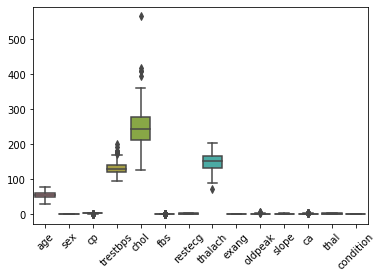

In [13]:
# Create a boxplot to identify outliers
ax = sns.boxplot(data=data)
ax.set_xticklabels(labels=data.columns,
                   rotation = 45)

# Calculate the Z-score for each value
z_scores = (data - data.mean()) / data.std()

# Identify and remove outliers
data = data[(z_scores < 3).all(axis=1)]

In [14]:
# Encode the categorical features
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [18]:
# Split the dataset into training and testing sets
X = data.drop('condition', axis=1)
Y = data['condition']

In [31]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  # Default value -> test_size= 0.25
                                                    random_state=10)

In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(202, 28)
(202,)
(87, 28)
(87,)


In [33]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Evaluate the model
score = model.score(X_test, Y_test)
print(f"Accuracy: {score}")

Accuracy: 0.8045977011494253


In [34]:
# Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Confusion Matrix:
 [[39  8]
 [ 9 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.79      0.78      0.78        40

    accuracy                           0.80        87
   macro avg       0.80      0.80      0.80        87
weighted avg       0.80      0.80      0.80        87

